# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

# Load Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam, SGD
from keras import optimizers

# Load Data

In [2]:
car_df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
car_df.shape

(205, 26)

# Check Missing Data

In [4]:
car_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# OneHotEncoding for Non-numerical values

#### Use Onehot encoding for Categorical Features instead of Label encoding (drop First column of each enconding to reduce number of encoded columns)
#### For Categorical/Onehot encoded data, use different correlation if required, generally DL models can handle all columns

In [6]:
# check how many categories present in each Column
cat_list = []
count = 0
for col in car_df.columns:
    if car_df[col].dtype == 'O' and col != 'CarName':
        print(len(car_df[col].unique())," lablels in ",col)
        cat_list.append(col)
        count += len(car_df[col].unique())

2  lablels in  fueltype
2  lablels in  aspiration
2  lablels in  doornumber
5  lablels in  carbody
3  lablels in  drivewheel
2  lablels in  enginelocation
7  lablels in  enginetype
7  lablels in  cylindernumber
8  lablels in  fuelsystem


In [7]:
print(cat_list)

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [8]:
count

38

### Onehot Encode with get_dummies

In [9]:
ohe = pd.get_dummies(car_df[cat_list],drop_first=True)

In [10]:
ohe.head(2)

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
ohe_labels  = ohe.columns

In [12]:
car_df1 = car_df.drop(cat_list,axis='columns')
car_df1 = car_df1.drop(['car_ID','CarName'],axis='columns')
car_df1.head(2)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0


In [13]:
car_df1.shape

(205, 15)

In [14]:
car = pd.concat([car_df1,ohe],axis='columns')

In [15]:
car.shape

(205, 44)

In [16]:
car.head(2)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
x = car.drop(['price'], axis='columns')
y = (car.loc[:, car.columns == 'price'])

# Split Data into Train, Test and Validation

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Split to 70% Train and 30% Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

# Split 50% Test into further 15% Test and 15% Validation
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.50, random_state=1)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(143, 43)
(31, 43)
(31, 43)


In [21]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(143, 1)
(31, 1)
(31, 1)


# Use Standard Scaler to Scale all Features

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
# Use MinMax Scaller to scale all features
std_scaler = StandardScaler()

In [24]:
car.drop(ohe_labels, axis = 1).drop('price',axis=1).columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [25]:
# Chnages
x_train_s = std_scaler.fit_transform(x_train.drop(ohe_labels,axis=1))
x_test_s = std_scaler.transform(x_test.drop(ohe_labels,axis=1))
x_val_s = std_scaler.transform(x_val.drop(ohe_labels,axis=1))

In [26]:
print(x_train_s.shape)
print(x_test_s.shape)
print(x_val_s.shape)

(143, 14)
(31, 14)
(31, 14)


In [27]:
x_train_s_df = pd.DataFrame(x_train_s,columns= car.drop(ohe_labels, axis = 1).drop('price',axis=1).columns)

In [28]:
x_train_s_df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1.697857,-0.479744,-0.129820,0.124696,-1.387533,0.473360,0.668636,0.930577,2.020223,-0.798286,0.914374,-0.283485,-0.909193,-0.948853
1,-1.424890,0.969150,1.118628,0.217568,0.152728,1.129918,0.790191,-0.249340,0.398128,-0.228703,1.178381,0.154767,-0.909193,-0.948853
2,-0.644203,-0.513440,-0.429105,-1.129080,2.127421,-0.567668,-0.887264,-1.060533,-0.619657,-0.280483,-1.077679,-0.721736,0.342452,0.250581
3,0.136484,-0.951477,-0.677085,-0.850463,0.152728,-1.247886,-0.911575,-1.134278,-0.237987,-0.280483,-0.933675,-0.283485,0.968274,1.150157
4,0.136484,-0.715611,-0.805350,-1.036208,0.310703,-1.236056,-0.765710,-0.691809,0.207294,-0.176922,-0.909675,0.154767,0.968274,1.000228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.917170,0.059379,1.016016,0.217568,0.942605,0.230848,-0.182247,0.746215,-0.492433,-0.202812,0.074352,0.264330,-0.596282,-0.349136
139,0.917170,0.059379,1.016016,0.217568,0.942605,0.530538,-0.182247,0.746215,-0.492433,-0.280483,1.274384,0.812145,-0.909193,-0.648995
140,1.697857,-0.361811,0.477302,2.075014,-1.150569,2.182776,2.564890,0.451236,-0.397016,-0.461714,1.154380,-0.831299,-1.378559,-1.848429
141,0.917170,-0.917782,-1.489431,-1.036208,0.784630,-0.666250,-0.498289,1.041195,-1.860082,-0.358153,-0.813672,-1.598240,0.185996,0.100652


In [29]:
x_test_s_df = pd.DataFrame(x_test_s,columns= car.drop(ohe_labels, axis = 1).drop('price',axis=1).columns)

In [30]:
x_test_s_df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,-0.644203,-0.378659,-0.617228,-0.386102,-0.163223,-0.569640,-0.449667,-0.691809,1.129661,-0.280483,-0.501664,1.469523,0.342452,0.400510
1,-0.644203,0.413179,0.178017,-0.571846,0.231716,-0.360646,-0.498289,0.598726,-1.351189,-0.332263,-0.141654,1.469523,-0.283370,-0.199207
2,-0.644203,0.800674,1.631689,0.867674,-0.005247,1.581424,1.957116,1.041195,0.525351,-0.539385,1.802398,0.593019,-1.378559,-1.248712
3,0.136484,-0.715611,-0.514616,-0.943336,-0.439680,-0.806237,-0.741399,-0.544319,-0.619657,-0.280483,-0.885674,-0.721736,0.655363,0.550440
4,0.136484,-0.850392,-1.489431,-1.036208,-1.229557,-0.762861,-0.741399,-1.134278,0.525351,-0.642945,-0.117653,0.812145,-0.126915,-0.049277
5,0.136484,-0.850392,-1.489431,-1.036208,-1.150569,-0.887075,-0.741399,-1.134278,0.525351,-0.642945,-0.117653,0.812145,-0.126915,-0.049277
6,-0.644203,-0.378659,0.058302,-1.639878,0.152728,-0.405993,-0.449667,-0.691809,1.129661,-0.280483,-0.501664,1.469523,0.342452,0.400510
7,1.697857,-0.479744,-0.129820,0.124696,-1.387533,0.459559,0.668636,0.967450,2.147446,-0.798286,0.914374,-0.283485,-0.909193,-0.948853
8,-0.644203,-0.378659,-0.967819,-0.943336,0.310703,-1.119729,-0.887264,-1.576747,0.588963,-0.228703,-0.741670,1.907774,0.811818,0.550440
9,0.136484,-0.850392,-1.489431,-1.036208,-1.229557,-1.204509,-0.935886,-1.355513,0.016459,-0.176922,-0.933675,0.812145,0.968274,1.150157


In [31]:
x_val_s_df = pd.DataFrame(x_val_s,columns= car.drop(ohe_labels, axis = 1).drop('price',axis=1).columns)

In [32]:
x_val_s_df.shape

(31, 14)

### Join Ohe and Scalled Cont Variables

In [33]:
x_train.reset_index(inplace=True)

In [34]:
x_train_f = pd.concat([x_train_s_df,x_train[ohe_labels]], axis=1)

In [35]:
x_train_f

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.697857,-0.479744,-0.129820,0.124696,-1.387533,0.473360,0.668636,0.930577,2.020223,-0.798286,...,0,0,0,0,0,0,0,0,1,0
1,-1.424890,0.969150,1.118628,0.217568,0.152728,1.129918,0.790191,-0.249340,0.398128,-0.228703,...,0,0,0,0,0,0,0,1,0,0
2,-0.644203,-0.513440,-0.429105,-1.129080,2.127421,-0.567668,-0.887264,-1.060533,-0.619657,-0.280483,...,0,0,0,1,0,0,0,0,0,0
3,0.136484,-0.951477,-0.677085,-0.850463,0.152728,-1.247886,-0.911575,-1.134278,-0.237987,-0.280483,...,0,0,0,1,0,0,0,0,0,0
4,0.136484,-0.715611,-0.805350,-1.036208,0.310703,-1.236056,-0.765710,-0.691809,0.207294,-0.176922,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.917170,0.059379,1.016016,0.217568,0.942605,0.230848,-0.182247,0.746215,-0.492433,-0.202812,...,0,0,0,0,0,0,0,1,0,0
139,0.917170,0.059379,1.016016,0.217568,0.942605,0.530538,-0.182247,0.746215,-0.492433,-0.280483,...,0,0,0,0,0,0,0,1,0,0
140,1.697857,-0.361811,0.477302,2.075014,-1.150569,2.182776,2.564890,0.451236,-0.397016,-0.461714,...,0,0,0,0,0,0,0,1,0,0
141,0.917170,-0.917782,-1.489431,-1.036208,0.784630,-0.666250,-0.498289,1.041195,-1.860082,-0.358153,...,0,0,0,1,0,0,0,0,0,0


In [36]:
x_test.reset_index(inplace=True)

In [37]:
x_test_f = pd.concat([x_test_s_df,x_test[ohe_labels]], axis=1)

In [38]:
x_test_f

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-0.644203,-0.378659,-0.617228,-0.386102,-0.163223,-0.569640,-0.449667,-0.691809,1.129661,-0.280483,...,0,0,0,0,0,0,0,0,0,0
1,-0.644203,0.413179,0.178017,-0.571846,0.231716,-0.360646,-0.498289,0.598726,-1.351189,-0.332263,...,0,0,0,0,0,0,0,1,0,0
2,-0.644203,0.800674,1.631689,0.867674,-0.005247,1.581424,1.957116,1.041195,0.525351,-0.539385,...,0,0,0,0,0,0,0,1,0,0
3,0.136484,-0.715611,-0.514616,-0.943336,-0.439680,-0.806237,-0.741399,-0.544319,-0.619657,-0.280483,...,0,0,0,1,0,0,0,0,0,0
4,0.136484,-0.850392,-1.489431,-1.036208,-1.229557,-0.762861,-0.741399,-1.134278,0.525351,-0.642945,...,0,0,0,0,0,0,0,1,0,0
5,0.136484,-0.850392,-1.489431,-1.036208,-1.150569,-0.887075,-0.741399,-1.134278,0.525351,-0.642945,...,0,0,0,0,0,0,0,0,1,0
6,-0.644203,-0.378659,0.058302,-1.639878,0.152728,-0.405993,-0.449667,-0.691809,1.129661,-0.280483,...,0,0,0,0,0,0,0,0,0,0
7,1.697857,-0.479744,-0.129820,0.124696,-1.387533,0.459559,0.668636,0.967450,2.147446,-0.798286,...,0,0,0,0,0,0,1,0,0,0
8,-0.644203,-0.378659,-0.967819,-0.943336,0.310703,-1.119729,-0.887264,-1.576747,0.588963,-0.228703,...,0,0,0,0,0,0,0,0,0,0
9,0.136484,-0.850392,-1.489431,-1.036208,-1.229557,-1.204509,-0.935886,-1.355513,0.016459,-0.176922,...,0,0,0,1,0,0,0,0,0,0


In [39]:
x_val.reset_index(inplace=True)

In [40]:
x_val_f = pd.concat([x_val_s_df,x_val[ohe_labels]], axis=1)

In [41]:
x_val_f

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0.917170,-2.046572,-2.575410,-0.989772,-1.150569,-1.496313,-0.887264,-1.576747,0.588963,-0.228703,...,0,0,0,0,0,0,0,0,0,0
1,0.136484,0.800674,1.221240,0.403312,0.784630,0.940640,0.863124,-0.101850,-0.110764,-0.280483,...,0,0,0,0,0,0,0,1,0,0
2,1.697857,-0.580830,-0.488963,-0.153921,-1.624496,-0.153623,-1.178996,-0.028106,0.095973,-0.176922,...,0,0,1,0,0,0,0,1,0,0
3,0.917170,-0.058554,0.126710,-0.200357,-0.676643,-0.053069,0.425527,1.041195,0.875215,-0.202812,...,0,0,0,0,0,0,0,1,0,0
4,0.136484,-0.513440,-1.369717,-1.129080,0.310703,-1.060579,-0.887264,-1.060533,-0.619657,-0.280483,...,0,0,0,1,0,0,0,0,0,0
5,0.136484,0.076227,0.323384,0.867674,-1.585002,1.106258,1.276410,0.340619,0.143682,-0.280483,...,0,0,0,0,0,0,0,1,0,0
6,1.697857,-0.580830,-0.488963,-0.153921,-1.624496,-0.390220,-1.422105,-0.028106,0.095973,-0.176922,...,0,0,1,0,1,0,0,0,0,0
7,-0.644203,1.339797,1.092975,1.982141,0.468679,1.808164,1.325032,0.893705,1.320496,2.955788,...,0,0,0,0,0,1,0,0,0,0
8,0.917170,-0.243878,-0.258085,-0.246793,0.784630,-0.624846,-0.765710,-1.208023,0.557157,3.344141,...,0,0,0,0,0,1,0,0,0,0
9,0.917170,-0.243878,-0.258085,-0.246793,0.784630,-0.721456,-0.473978,-0.544319,0.557157,-0.280483,...,0,0,0,0,0,0,0,1,0,0


# Create Model

In [42]:
# Build Model and Architecture of Deep Neural Network
# Add layers of Neural Network = 4 , input_dim = number of features
# units = 10,8,6 is number of neurons
# Since this is Regression Problem , so last layer activation function is None.

model = Sequential()
model.add(Dense(10, activation='relu', input_dim=43))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

In [43]:
# Loss Function measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['mae'])

In [44]:
hist = model.fit(
    x_train_f, y_train, epochs = 800,
    validation_data = (x_val_f, y_val)
)

Epoch 1/800
5/5 [==============================] - 1s 94ms/step - loss: 245437864.0000 - mae: 13473.9456 - val_loss: 221020768.0000 - val_mae: 12741.1973
Epoch 2/800
5/5 [==============================] - 0s 14ms/step - loss: 247380829.3333 - mae: 13583.1095 - val_loss: 221017712.0000 - val_mae: 12741.1172
Epoch 3/800
5/5 [==============================] - 0s 13ms/step - loss: 250460413.3333 - mae: 13619.5049 - val_loss: 221014400.0000 - val_mae: 12741.0303
Epoch 4/800
5/5 [==============================] - 0s 14ms/step - loss: 260963082.6667 - mae: 14016.7471 - val_loss: 221010720.0000 - val_mae: 12740.9297
Epoch 5/800
5/5 [==============================] - 0s 15ms/step - loss: 234684845.3333 - mae: 13203.7064 - val_loss: 221006848.0000 - val_mae: 12740.8213
Epoch 6/800
5/5 [==============================] - ETA: 0s - loss: 186161632.0000 - mae: 12339.787 - 0s 13ms/step - loss: 225106018.6667 - mae: 13059.2114 - val_loss: 221002528.0000 - val_mae: 12740.6973
Epoch 7/800
5/5 [=========

Epoch 106/800
5/5 [==============================] - 0s 15ms/step - loss: 219243733.3333 - mae: 12710.4990 - val_loss: 181591872.0000 - val_mae: 11541.3506
Epoch 107/800
5/5 [==============================] - 0s 15ms/step - loss: 190611773.3333 - mae: 11975.1825 - val_loss: 180139280.0000 - val_mae: 11495.5645
Epoch 108/800
5/5 [==============================] - 0s 30ms/step - loss: 228404338.6667 - mae: 12919.0059 - val_loss: 178620096.0000 - val_mae: 11447.6689
Epoch 109/800
5/5 [==============================] - 0s 14ms/step - loss: 209577522.6667 - mae: 12373.0381 - val_loss: 177121920.0000 - val_mae: 11399.9004
Epoch 110/800
5/5 [==============================] - 0s 15ms/step - loss: 194810674.6667 - mae: 12129.1064 - val_loss: 175620752.0000 - val_mae: 11351.6416
Epoch 111/800
5/5 [==============================] - 0s 15ms/step - loss: 200226058.6667 - mae: 12034.7116 - val_loss: 174082656.0000 - val_mae: 11302.0967
Epoch 112/800
5/5 [==============================] - 0s 15ms/ste

Epoch 159/800
5/5 [==============================] - 0s 19ms/step - loss: 81951394.6667 - mae: 7755.6826 - val_loss: 75117912.0000 - val_mae: 7385.7129
Epoch 160/800
5/5 [==============================] - 0s 19ms/step - loss: 83139160.0000 - mae: 7717.4325 - val_loss: 73052088.0000 - val_mae: 7276.1357
Epoch 161/800
5/5 [==============================] - 0s 19ms/step - loss: 86610838.6667 - mae: 7779.2918 - val_loss: 70976432.0000 - val_mae: 7163.9692
Epoch 162/800
5/5 [==============================] - 0s 23ms/step - loss: 87584986.6667 - mae: 7783.9377 - val_loss: 68993128.0000 - val_mae: 7054.3247
Epoch 163/800
5/5 [==============================] - 0s 26ms/step - loss: 92831109.3333 - mae: 7883.5238 - val_loss: 66999052.0000 - val_mae: 6942.0874
Epoch 164/800
5/5 [==============================] - 0s 20ms/step - loss: 75704364.0000 - mae: 7243.1589 - val_loss: 65130040.0000 - val_mae: 6834.1494
Epoch 165/800
5/5 [==============================] - 0s 18ms/step - loss: 83024973.3333 

Epoch 213/800
5/5 [==============================] - 0s 15ms/step - loss: 20979726.3333 - mae: 3561.3250 - val_loss: 19885562.0000 - val_mae: 3965.2087
Epoch 214/800
5/5 [==============================] - 0s 17ms/step - loss: 26226743.6667 - mae: 3850.0301 - val_loss: 19694592.0000 - val_mae: 3950.2432
Epoch 215/800
5/5 [==============================] - 0s 21ms/step - loss: 26853974.6667 - mae: 3940.1319 - val_loss: 19507154.0000 - val_mae: 3935.2417
Epoch 216/800
5/5 [==============================] - 0s 19ms/step - loss: 26397149.6667 - mae: 3820.4404 - val_loss: 19335280.0000 - val_mae: 3920.6794
Epoch 217/800
5/5 [==============================] - 0s 18ms/step - loss: 24004239.6667 - mae: 3679.3267 - val_loss: 19177522.0000 - val_mae: 3906.4858
Epoch 218/800
5/5 [==============================] - 0s 20ms/step - loss: 24119137.0000 - mae: 3862.8905 - val_loss: 19022196.0000 - val_mae: 3892.3101
Epoch 219/800
5/5 [==============================] - 0s 17ms/step - loss: 20214615.3333 

Epoch 267/800
5/5 [==============================] - 0s 15ms/step - loss: 17735465.3333 - mae: 3307.6456 - val_loss: 15403212.0000 - val_mae: 3434.4409
Epoch 268/800
5/5 [==============================] - 0s 15ms/step - loss: 17946738.0000 - mae: 3278.9069 - val_loss: 15345683.0000 - val_mae: 3426.6335
Epoch 269/800
5/5 [==============================] - 0s 15ms/step - loss: 16880482.3333 - mae: 3256.1377 - val_loss: 15288128.0000 - val_mae: 3418.8328
Epoch 270/800
5/5 [==============================] - 0s 15ms/step - loss: 17175061.6667 - mae: 3238.7360 - val_loss: 15234782.0000 - val_mae: 3411.4744
Epoch 271/800
5/5 [==============================] - 0s 15ms/step - loss: 16016040.5000 - mae: 3186.2762 - val_loss: 15181735.0000 - val_mae: 3403.8250
Epoch 272/800
5/5 [==============================] - 0s 15ms/step - loss: 14992376.5000 - mae: 3068.4018 - val_loss: 15128191.0000 - val_mae: 3396.2471
Epoch 273/800
5/5 [==============================] - 0s 15ms/step - loss: 16580722.5000 

Epoch 321/800
5/5 [==============================] - 0s 14ms/step - loss: 13869409.0000 - mae: 2860.0347 - val_loss: 12840615.0000 - val_mae: 3057.4897
Epoch 322/800
5/5 [==============================] - 0s 15ms/step - loss: 15057958.1667 - mae: 2986.9013 - val_loss: 12797431.0000 - val_mae: 3051.3647
Epoch 323/800
5/5 [==============================] - 0s 16ms/step - loss: 13948246.5000 - mae: 2940.0870 - val_loss: 12755338.0000 - val_mae: 3045.0547
Epoch 324/800
5/5 [==============================] - 0s 15ms/step - loss: 16092075.1667 - mae: 3068.1095 - val_loss: 12720233.0000 - val_mae: 3038.5688
Epoch 325/800
5/5 [==============================] - 0s 14ms/step - loss: 14390346.3333 - mae: 2941.7723 - val_loss: 12683821.0000 - val_mae: 3032.2117
Epoch 326/800
5/5 [==============================] - 0s 17ms/step - loss: 13736121.8333 - mae: 2900.6916 - val_loss: 12638935.0000 - val_mae: 3026.0869
Epoch 327/800
5/5 [==============================] - 0s 16ms/step - loss: 15621139.6667 

Epoch 375/800
5/5 [==============================] - 0s 16ms/step - loss: 14114322.0000 - mae: 2859.3121 - val_loss: 11007718.0000 - val_mae: 2743.7356
Epoch 376/800
5/5 [==============================] - 0s 16ms/step - loss: 13819469.6667 - mae: 2871.5895 - val_loss: 10977517.0000 - val_mae: 2737.9478
Epoch 377/800
5/5 [==============================] - 0s 17ms/step - loss: 11567928.0000 - mae: 2606.1751 - val_loss: 10948961.0000 - val_mae: 2732.4329
Epoch 378/800
5/5 [==============================] - 0s 15ms/step - loss: 13099921.1667 - mae: 2746.4988 - val_loss: 10925027.0000 - val_mae: 2727.2249
Epoch 379/800
5/5 [==============================] - 0s 15ms/step - loss: 13822057.5000 - mae: 2794.4351 - val_loss: 10897666.0000 - val_mae: 2722.1357
Epoch 380/800
5/5 [==============================] - 0s 16ms/step - loss: 11965288.5000 - mae: 2687.5969 - val_loss: 10870539.0000 - val_mae: 2716.9365
Epoch 381/800
5/5 [==============================] - 0s 15ms/step - loss: 11911088.6667 

Epoch 429/800
5/5 [==============================] - 0s 19ms/step - loss: 10794295.6667 - mae: 2493.7586 - val_loss: 9705251.0000 - val_mae: 2465.9236
Epoch 430/800
5/5 [==============================] - 0s 18ms/step - loss: 11917648.6667 - mae: 2619.4471 - val_loss: 9687423.0000 - val_mae: 2461.0166
Epoch 431/800
5/5 [==============================] - 0s 19ms/step - loss: 11238015.5000 - mae: 2566.6199 - val_loss: 9665383.0000 - val_mae: 2456.8352
Epoch 432/800
5/5 [==============================] - 0s 20ms/step - loss: 11891128.5000 - mae: 2641.7076 - val_loss: 9648389.0000 - val_mae: 2452.2610
Epoch 433/800
5/5 [==============================] - 0s 18ms/step - loss: 13140985.5000 - mae: 2737.4967 - val_loss: 9633577.0000 - val_mae: 2447.0010
Epoch 434/800
5/5 [==============================] - 0s 16ms/step - loss: 10086586.6667 - mae: 2426.9673 - val_loss: 9610420.0000 - val_mae: 2442.4409
Epoch 435/800
5/5 [==============================] - 0s 17ms/step - loss: 12663606.1667 - mae:

5/5 [==============================] - 0s 16ms/step - loss: 8678786.2500 - mae: 2153.7571 - val_loss: 7998900.5000 - val_mae: 2090.0728
Epoch 538/800
5/5 [==============================] - 0s 15ms/step - loss: 9539178.5000 - mae: 2319.2672 - val_loss: 7988133.0000 - val_mae: 2087.0417
Epoch 539/800
5/5 [==============================] - 0s 15ms/step - loss: 9248280.5000 - mae: 2342.2995 - val_loss: 7974110.0000 - val_mae: 2084.8447
Epoch 540/800
5/5 [==============================] - 0s 15ms/step - loss: 10104374.5000 - mae: 2347.2487 - val_loss: 7965280.0000 - val_mae: 2081.1995
Epoch 541/800
5/5 [==============================] - 0s 14ms/step - loss: 10038732.0000 - mae: 2339.8666 - val_loss: 7951531.0000 - val_mae: 2078.3921
Epoch 542/800
5/5 [==============================] - 0s 15ms/step - loss: 8419262.0000 - mae: 2161.5799 - val_loss: 7940114.5000 - val_mae: 2075.2927
Epoch 543/800
5/5 [==============================] - 0s 15ms/step - loss: 9697983.5000 - mae: 2299.7077 - val_lo

5/5 [==============================] - 0s 16ms/step - loss: 8494610.5000 - mae: 2127.6156 - val_loss: 7474724.0000 - val_mae: 1949.6847
Epoch 592/800
5/5 [==============================] - 0s 15ms/step - loss: 8868996.2500 - mae: 2222.6927 - val_loss: 7459724.0000 - val_mae: 1948.7628
Epoch 593/800
5/5 [==============================] - 0s 15ms/step - loss: 9442328.0000 - mae: 2330.3802 - val_loss: 7450309.0000 - val_mae: 1946.6124
Epoch 594/800
5/5 [==============================] - 0s 15ms/step - loss: 8041935.3333 - mae: 2120.0405 - val_loss: 7439799.0000 - val_mae: 1944.8440
Epoch 595/800
5/5 [==============================] - 0s 14ms/step - loss: 10275236.8333 - mae: 2340.7786 - val_loss: 7440458.5000 - val_mae: 1941.4349
Epoch 596/800
5/5 [==============================] - 0s 15ms/step - loss: 8560785.7500 - mae: 2131.2049 - val_loss: 7438577.5000 - val_mae: 1938.4602
Epoch 597/800
5/5 [==============================] - 0s 15ms/step - loss: 8573178.9167 - mae: 2139.7644 - val_los

Epoch 700/800
5/5 [==============================] - 0s 23ms/step - loss: 8116063.2500 - mae: 2118.9969 - val_loss: 6639905.0000 - val_mae: 1822.9657
Epoch 701/800
5/5 [==============================] - 0s 25ms/step - loss: 7775293.0833 - mae: 2025.6210 - val_loss: 6632599.0000 - val_mae: 1822.5931
Epoch 702/800
5/5 [==============================] - 0s 25ms/step - loss: 8755905.6667 - mae: 2233.6717 - val_loss: 6625480.5000 - val_mae: 1822.3916
Epoch 703/800
5/5 [==============================] - 0s 19ms/step - loss: 8393939.3333 - mae: 2125.3939 - val_loss: 6624945.5000 - val_mae: 1821.7815
Epoch 704/800
5/5 [==============================] - 0s 18ms/step - loss: 7731340.5833 - mae: 2069.8480 - val_loss: 6619950.5000 - val_mae: 1820.9358
Epoch 705/800
5/5 [==============================] - 0s 18ms/step - loss: 8031515.5000 - mae: 2049.3098 - val_loss: 6617829.5000 - val_mae: 1820.1160
Epoch 706/800
5/5 [==============================] - 0s 16ms/step - loss: 8303919.5833 - mae: 2102.8

# Check Model's Loss and Mean Absolute Error against Validation Data

In [45]:
hist.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

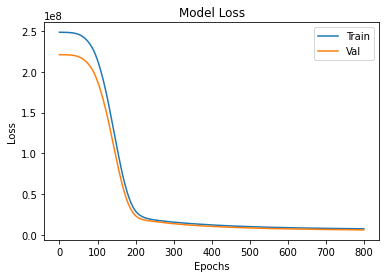

In [46]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

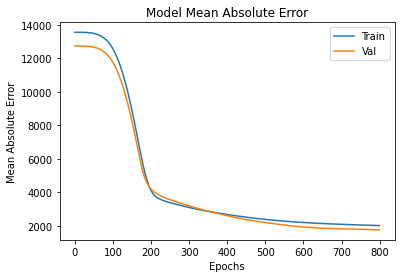

In [47]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["mae"])
plt.plot(hist.history["val_mae"])
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# (1) Retune Model (increase neurons per layer)

In [48]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()
model.add(Dense(10, activation='relu', input_dim=43))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [49]:
# Loss Function measures how well the model did on training and then tries
# to improve on it using optimizer
# optimizer=optimizers.RMSprop(lr=1e-4)
model.compile(optimizer='rmsprop',
             loss = 'mse',
             metrics = ['mae'])

In [50]:
hist = model.fit(
    x_train_f, y_train, epochs = 800,
    validation_data = (x_val_f, y_val)
)

Epoch 1/800
5/5 [==============================] - 1s 48ms/step - loss: 232280490.6667 - mae: 13059.9292 - val_loss: 221017648.0000 - val_mae: 12740.7480
Epoch 2/800
5/5 [==============================] - 0s 16ms/step - loss: 248595416.0000 - mae: 13520.2515 - val_loss: 221012400.0000 - val_mae: 12740.5078
Epoch 3/800
5/5 [==============================] - 0s 16ms/step - loss: 240423216.0000 - mae: 13584.2311 - val_loss: 221007232.0000 - val_mae: 12740.2734
Epoch 4/800
5/5 [==============================] - 0s 17ms/step - loss: 261635789.3333 - mae: 13965.8895 - val_loss: 221001360.0000 - val_mae: 12740.0225
Epoch 5/800
5/5 [==============================] - 0s 16ms/step - loss: 265124738.6667 - mae: 13823.9554 - val_loss: 220994496.0000 - val_mae: 12739.7441
Epoch 6/800
5/5 [==============================] - 0s 18ms/step - loss: 249817005.3333 - mae: 13666.9604 - val_loss: 220987264.0000 - val_mae: 12739.4541
Epoch 7/800
5/5 [==============================] - 0s 18ms/step - loss: 2260

Epoch 54/800
5/5 [==============================] - 0s 16ms/step - loss: 236826336.0000 - mae: 13153.1463 - val_loss: 219058208.0000 - val_mae: 12667.5947
Epoch 55/800
5/5 [==============================] - 0s 19ms/step - loss: 248234301.3333 - mae: 13639.1896 - val_loss: 218959072.0000 - val_mae: 12664.0566
Epoch 56/800
5/5 [==============================] - 0s 18ms/step - loss: 249419272.0000 - mae: 13610.1733 - val_loss: 218855232.0000 - val_mae: 12660.4131
Epoch 57/800
5/5 [==============================] - 0s 20ms/step - loss: 248458165.3333 - mae: 13697.3888 - val_loss: 218750016.0000 - val_mae: 12656.7080
Epoch 58/800
5/5 [==============================] - 0s 20ms/step - loss: 275545450.6667 - mae: 14192.8962 - val_loss: 218643232.0000 - val_mae: 12652.8672
Epoch 59/800
5/5 [==============================] - 0s 19ms/step - loss: 231582752.0000 - mae: 13198.5033 - val_loss: 218529600.0000 - val_mae: 12648.8467
Epoch 60/800
5/5 [==============================] - 0s 21ms/step - los

Epoch 107/800
5/5 [==============================] - 0s 18ms/step - loss: 249944570.6667 - mae: 13515.5220 - val_loss: 206594944.0000 - val_mae: 12251.3789
Epoch 108/800
5/5 [==============================] - 0s 17ms/step - loss: 236144325.3333 - mae: 13151.5863 - val_loss: 206159712.0000 - val_mae: 12237.3340
Epoch 109/800
5/5 [==============================] - 0s 17ms/step - loss: 229326432.0000 - mae: 12902.6597 - val_loss: 205725360.0000 - val_mae: 12223.0713
Epoch 110/800
5/5 [==============================] - 0s 18ms/step - loss: 235854128.0000 - mae: 13177.3955 - val_loss: 205294224.0000 - val_mae: 12208.9795
Epoch 111/800
5/5 [==============================] - 0s 17ms/step - loss: 209745674.6667 - mae: 12508.0140 - val_loss: 204832896.0000 - val_mae: 12194.0225
Epoch 112/800
5/5 [==============================] - 0s 18ms/step - loss: 262771776.0000 - mae: 13810.8999 - val_loss: 204396112.0000 - val_mae: 12179.6113
Epoch 113/800
5/5 [==============================] - 0s 16ms/ste

Epoch 212/800
5/5 [==============================] - 0s 21ms/step - loss: 109094478.6667 - mae: 8723.9578 - val_loss: 104333480.0000 - val_mae: 8511.1934
Epoch 213/800
5/5 [==============================] - 0s 20ms/step - loss: 111187394.6667 - mae: 8707.6665 - val_loss: 102748648.0000 - val_mae: 8441.9570
Epoch 214/800
5/5 [==============================] - 0s 19ms/step - loss: 123438044.0000 - mae: 9211.1196 - val_loss: 101286576.0000 - val_mae: 8375.8623
Epoch 215/800
5/5 [==============================] - 0s 19ms/step - loss: 113018690.6667 - mae: 8714.5636 - val_loss: 99742296.0000 - val_mae: 8306.6709
Epoch 216/800
5/5 [==============================] - 0s 18ms/step - loss: 123383374.6667 - mae: 9085.4001 - val_loss: 98250816.0000 - val_mae: 8238.5020
Epoch 217/800
5/5 [==============================] - 0s 18ms/step - loss: 102135005.3333 - mae: 8542.9125 - val_loss: 96608928.0000 - val_mae: 8163.7231
Epoch 218/800
5/5 [==============================] - 0s 17ms/step - loss: 10332

Epoch 266/800
5/5 [==============================] - 0s 17ms/step - loss: 35885491.6667 - mae: 4346.1592 - val_loss: 30406314.0000 - val_mae: 4301.2300
Epoch 267/800
5/5 [==============================] - 0s 17ms/step - loss: 31580746.0000 - mae: 3999.2889 - val_loss: 29429648.0000 - val_mae: 4264.4971
Epoch 268/800
5/5 [==============================] - 0s 19ms/step - loss: 35787745.3333 - mae: 4265.7045 - val_loss: 28655620.0000 - val_mae: 4233.1943
Epoch 269/800
5/5 [==============================] - 0s 18ms/step - loss: 27794926.6667 - mae: 3865.2804 - val_loss: 27819554.0000 - val_mae: 4205.1460
Epoch 270/800
5/5 [==============================] - 0s 19ms/step - loss: 30380535.3333 - mae: 3847.4082 - val_loss: 27043234.0000 - val_mae: 4177.7085
Epoch 271/800
5/5 [==============================] - 0s 20ms/step - loss: 33573546.0000 - mae: 4211.9215 - val_loss: 26352132.0000 - val_mae: 4150.7808
Epoch 272/800
5/5 [==============================] - 0s 21ms/step - loss: 31953997.0000 

Epoch 320/800
5/5 [==============================] - 0s 17ms/step - loss: 15635978.3333 - mae: 3142.6107 - val_loss: 15544050.0000 - val_mae: 3449.6643
Epoch 321/800
5/5 [==============================] - 0s 17ms/step - loss: 17166019.3333 - mae: 3330.1306 - val_loss: 15445818.0000 - val_mae: 3437.7766
Epoch 322/800
5/5 [==============================] - 0s 17ms/step - loss: 18501222.3333 - mae: 3251.6989 - val_loss: 15350074.0000 - val_mae: 3425.9248
Epoch 323/800
5/5 [==============================] - 0s 17ms/step - loss: 17838802.0000 - mae: 3289.7360 - val_loss: 15255860.0000 - val_mae: 3414.3992
Epoch 324/800
5/5 [==============================] - 0s 18ms/step - loss: 15921276.0000 - mae: 3137.9294 - val_loss: 15219864.0000 - val_mae: 3408.9678
Epoch 325/800
5/5 [==============================] - 0s 16ms/step - loss: 19756712.6667 - mae: 3404.4958 - val_loss: 15159566.0000 - val_mae: 3401.2090
Epoch 326/800
5/5 [==============================] - 0s 17ms/step - loss: 15722513.1667 

Epoch 374/800
5/5 [==============================] - 0s 17ms/step - loss: 14890815.3333 - mae: 2979.9504 - val_loss: 12053587.0000 - val_mae: 2933.5364
Epoch 375/800
5/5 [==============================] - 0s 17ms/step - loss: 15669332.5000 - mae: 3043.8318 - val_loss: 11997271.0000 - val_mae: 2925.4531
Epoch 376/800
5/5 [==============================] - 0s 16ms/step - loss: 11534686.0000 - mae: 2600.5575 - val_loss: 11963097.0000 - val_mae: 2915.8572
Epoch 377/800
5/5 [==============================] - 0s 16ms/step - loss: 14511983.3333 - mae: 2924.3881 - val_loss: 11929158.0000 - val_mae: 2906.8064
Epoch 378/800
5/5 [==============================] - 0s 17ms/step - loss: 14755678.5000 - mae: 2997.8539 - val_loss: 11864660.0000 - val_mae: 2897.9502
Epoch 379/800
5/5 [==============================] - 0s 18ms/step - loss: 12524947.8333 - mae: 2694.6375 - val_loss: 11800985.0000 - val_mae: 2887.8079
Epoch 380/800
5/5 [==============================] - 0s 17ms/step - loss: 12773526.0000 

Epoch 428/800
5/5 [==============================] - 0s 18ms/step - loss: 11154071.6667 - mae: 2472.5427 - val_loss: 9655769.0000 - val_mae: 2476.0515
Epoch 429/800
5/5 [==============================] - 0s 17ms/step - loss: 11385484.3333 - mae: 2529.5625 - val_loss: 9605763.0000 - val_mae: 2470.1033
Epoch 430/800
5/5 [==============================] - 0s 17ms/step - loss: 13589147.3333 - mae: 2762.5426 - val_loss: 9578149.0000 - val_mae: 2460.1785
Epoch 431/800
5/5 [==============================] - 0s 17ms/step - loss: 12861901.0000 - mae: 2701.4832 - val_loss: 9567197.0000 - val_mae: 2449.3755
Epoch 432/800
5/5 [==============================] - 0s 17ms/step - loss: 13456135.5000 - mae: 2787.3710 - val_loss: 9542116.0000 - val_mae: 2439.4104
Epoch 433/800
5/5 [==============================] - 0s 17ms/step - loss: 11610675.8333 - mae: 2563.0830 - val_loss: 9488710.0000 - val_mae: 2433.5129
Epoch 434/800
5/5 [==============================] - 0s 19ms/step - loss: 11562248.3333 - mae:

5/5 [==============================] - 0s 18ms/step - loss: 8432562.5833 - mae: 2109.6774 - val_loss: 7421877.0000 - val_mae: 1932.1155
Epoch 537/800
5/5 [==============================] - 0s 18ms/step - loss: 9346818.8333 - mae: 2292.8338 - val_loss: 7414910.5000 - val_mae: 1930.5112
Epoch 538/800
5/5 [==============================] - 0s 18ms/step - loss: 8736133.1667 - mae: 2143.3165 - val_loss: 7394045.0000 - val_mae: 1925.9872
Epoch 539/800
5/5 [==============================] - 0s 17ms/step - loss: 8556332.3333 - mae: 2128.2311 - val_loss: 7368943.5000 - val_mae: 1923.8534
Epoch 540/800
5/5 [==============================] - 0s 35ms/step - loss: 8830083.2500 - mae: 2182.6013 - val_loss: 7350782.5000 - val_mae: 1924.7668
Epoch 541/800
5/5 [==============================] - 0s 17ms/step - loss: 8373005.5000 - mae: 2155.9260 - val_loss: 7337338.0000 - val_mae: 1923.6189
Epoch 542/800
5/5 [==============================] - 0s 16ms/step - loss: 8670386.4167 - mae: 2122.8753 - val_loss

Epoch 591/800
5/5 [==============================] - 0s 18ms/step - loss: 7673024.8333 - mae: 2019.5355 - val_loss: 6931030.0000 - val_mae: 1875.9143
Epoch 592/800
5/5 [==============================] - 0s 17ms/step - loss: 7637950.3333 - mae: 2106.0418 - val_loss: 6913907.5000 - val_mae: 1875.1638
Epoch 593/800
5/5 [==============================] - 0s 17ms/step - loss: 6996554.2083 - mae: 1905.0434 - val_loss: 6929081.0000 - val_mae: 1875.4803
Epoch 594/800
5/5 [==============================] - 0s 17ms/step - loss: 9407606.0000 - mae: 2256.9484 - val_loss: 6918905.0000 - val_mae: 1874.8833
Epoch 595/800
5/5 [==============================] - 0s 18ms/step - loss: 7158102.6667 - mae: 1963.1806 - val_loss: 6921285.0000 - val_mae: 1875.3777
Epoch 596/800
5/5 [==============================] - 0s 17ms/step - loss: 8703035.8333 - mae: 2162.5773 - val_loss: 6919582.0000 - val_mae: 1874.9254
Epoch 597/800
5/5 [==============================] - 0s 17ms/step - loss: 9051814.0000 - mae: 2155.3

Epoch 700/800
5/5 [==============================] - 0s 36ms/step - loss: 6378164.3333 - mae: 1866.2470 - val_loss: 6249134.5000 - val_mae: 1806.8236
Epoch 701/800
5/5 [==============================] - 0s 17ms/step - loss: 7735981.1667 - mae: 2088.0810 - val_loss: 6222878.5000 - val_mae: 1804.5382
Epoch 702/800
5/5 [==============================] - 0s 18ms/step - loss: 6937168.0000 - mae: 1977.5365 - val_loss: 6226273.5000 - val_mae: 1803.1769
Epoch 703/800
5/5 [==============================] - 0s 17ms/step - loss: 7760711.9167 - mae: 2050.9722 - val_loss: 6212818.5000 - val_mae: 1803.1393
Epoch 704/800
5/5 [==============================] - 0s 17ms/step - loss: 6317937.5833 - mae: 1834.2184 - val_loss: 6198657.0000 - val_mae: 1802.7228
Epoch 705/800
5/5 [==============================] - 0s 17ms/step - loss: 6825663.3333 - mae: 1964.4479 - val_loss: 6207373.0000 - val_mae: 1803.5491
Epoch 706/800
5/5 [==============================] - 0s 17ms/step - loss: 7674037.2500 - mae: 2062.9

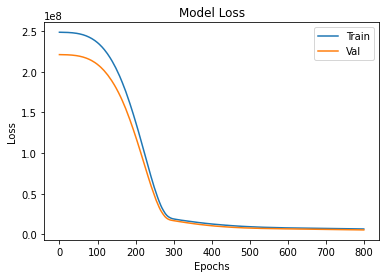

In [51]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

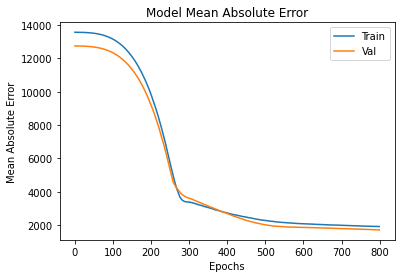

In [52]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["mae"])
plt.plot(hist.history["val_mae"])
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# (2) Retune Model (add dropout layer)

In [53]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()
model.add(Dense(10, activation='relu', input_dim=43))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [54]:
# Loss Function measures how well the model did on training and then tries
# to improve on it using optimizer
# optimizer=optimizers.RMSprop(lr=1e-4)
model.compile(optimizer='rmsprop',
             loss = 'mse',
             metrics = ['mae'])

In [55]:
hist = model.fit(
    x_train_f, y_train, epochs = 800,
    validation_data = (x_val_f, y_val)
)

Epoch 1/500
5/5 [==============================] - 1s 52ms/step - loss: 254916978.6667 - mae: 13682.3963 - val_loss: 220985904.0000 - val_mae: 12739.6416
Epoch 2/500
5/5 [==============================] - 0s 18ms/step - loss: 255898653.3333 - mae: 13805.1823 - val_loss: 220976416.0000 - val_mae: 12739.2959
Epoch 3/500
5/5 [==============================] - 0s 19ms/step - loss: 220254013.3333 - mae: 13003.9035 - val_loss: 220967232.0000 - val_mae: 12738.9756
Epoch 4/500
5/5 [==============================] - 0s 19ms/step - loss: 236632362.6667 - mae: 13264.5591 - val_loss: 220956544.0000 - val_mae: 12738.6006
Epoch 5/500
5/5 [==============================] - 0s 19ms/step - loss: 254850568.0000 - mae: 13750.6253 - val_loss: 220946240.0000 - val_mae: 12738.2422
Epoch 6/500
5/5 [==============================] - 0s 20ms/step - loss: 244215696.0000 - mae: 13524.0923 - val_loss: 220936624.0000 - val_mae: 12737.8936
Epoch 7/500
5/5 [==============================] - 0s 18ms/step - loss: 2462

Epoch 54/500
5/5 [==============================] - 0s 18ms/step - loss: 259259056.0000 - mae: 13685.3473 - val_loss: 218372224.0000 - val_mae: 12651.6514
Epoch 55/500
5/5 [==============================] - 0s 17ms/step - loss: 249602282.6667 - mae: 13690.2108 - val_loss: 218236560.0000 - val_mae: 12647.1172
Epoch 56/500
5/5 [==============================] - 0s 18ms/step - loss: 243661229.3333 - mae: 13514.8669 - val_loss: 218089808.0000 - val_mae: 12642.2139
Epoch 57/500
5/5 [==============================] - 0s 18ms/step - loss: 258893629.3333 - mae: 13822.0911 - val_loss: 217959568.0000 - val_mae: 12637.7275
Epoch 58/500
5/5 [==============================] - 0s 18ms/step - loss: 240787498.6667 - mae: 13266.6029 - val_loss: 217808000.0000 - val_mae: 12632.6895
Epoch 59/500
5/5 [==============================] - 0s 19ms/step - loss: 250454693.3333 - mae: 13520.3359 - val_loss: 217647600.0000 - val_mae: 12627.3311
Epoch 60/500
5/5 [==============================] - 0s 18ms/step - los

Epoch 107/500
5/5 [==============================] - 0s 20ms/step - loss: 208870850.6667 - mae: 12295.2137 - val_loss: 200735520.0000 - val_mae: 12052.0059
Epoch 108/500
5/5 [==============================] - 0s 20ms/step - loss: 213329240.0000 - mae: 12448.4507 - val_loss: 200116352.0000 - val_mae: 12030.5518
Epoch 109/500
5/5 [==============================] - 0s 19ms/step - loss: 227964066.6667 - mae: 12915.9993 - val_loss: 199559024.0000 - val_mae: 12010.8350
Epoch 110/500
5/5 [==============================] - 0s 20ms/step - loss: 212043258.6667 - mae: 12496.7484 - val_loss: 198921616.0000 - val_mae: 11988.6768
Epoch 111/500
5/5 [==============================] - 0s 20ms/step - loss: 223221832.0000 - mae: 12860.7062 - val_loss: 198340384.0000 - val_mae: 11968.2197
Epoch 112/500
5/5 [==============================] - 0s 18ms/step - loss: 236422274.6667 - mae: 12948.5955 - val_loss: 197662320.0000 - val_mae: 11944.8066
Epoch 113/500
5/5 [==============================] - 0s 18ms/ste

5/5 [==============================] - 0s 18ms/step - loss: 83979200.0000 - mae: 6779.1860 - val_loss: 63633236.0000 - val_mae: 6008.7788
Epoch 213/500
5/5 [==============================] - 0s 19ms/step - loss: 84516852.0000 - mae: 6617.5632 - val_loss: 61792248.0000 - val_mae: 5893.3535
Epoch 214/500
5/5 [==============================] - 0s 18ms/step - loss: 91967612.0000 - mae: 7045.3234 - val_loss: 60251856.0000 - val_mae: 5794.2075
Epoch 215/500
5/5 [==============================] - 0s 18ms/step - loss: 86939509.3333 - mae: 6806.6742 - val_loss: 58623960.0000 - val_mae: 5687.8428
Epoch 216/500
5/5 [==============================] - 0s 18ms/step - loss: 103420080.0000 - mae: 7008.1750 - val_loss: 57100148.0000 - val_mae: 5585.0688
Epoch 217/500
5/5 [==============================] - 0s 18ms/step - loss: 85282740.0000 - mae: 6435.0684 - val_loss: 55663380.0000 - val_mae: 5485.9824
Epoch 218/500
5/5 [==============================] - 0s 17ms/step - loss: 90432242.6667 - mae: 6687.4

Epoch 266/500
5/5 [==============================] - 0s 18ms/step - loss: 41764697.3333 - mae: 4700.0903 - val_loss: 15250594.0000 - val_mae: 3057.6345
Epoch 267/500
5/5 [==============================] - 0s 18ms/step - loss: 52556323.3333 - mae: 5209.5326 - val_loss: 15001871.0000 - val_mae: 3039.7656
Epoch 268/500
5/5 [==============================] - 0s 19ms/step - loss: 53805408.6667 - mae: 5191.6232 - val_loss: 15009611.0000 - val_mae: 3042.2131
Epoch 269/500
5/5 [==============================] - 0s 17ms/step - loss: 48662551.3333 - mae: 4945.3773 - val_loss: 14801703.0000 - val_mae: 3031.0281
Epoch 270/500
5/5 [==============================] - 0s 17ms/step - loss: 46096594.6667 - mae: 4940.8848 - val_loss: 14928747.0000 - val_mae: 3041.9641
Epoch 271/500
5/5 [==============================] - 0s 18ms/step - loss: 55759566.0000 - mae: 5251.4367 - val_loss: 14970408.0000 - val_mae: 3043.2495
Epoch 272/500
5/5 [==============================] - 0s 18ms/step - loss: 39901200.6667 

Epoch 320/500
5/5 [==============================] - 0s 22ms/step - loss: 36550396.8333 - mae: 3887.6737 - val_loss: 13500013.0000 - val_mae: 2939.1809
Epoch 321/500
5/5 [==============================] - 0s 22ms/step - loss: 54044668.0000 - mae: 4967.7178 - val_loss: 13317559.0000 - val_mae: 2927.4771
Epoch 322/500
5/5 [==============================] - 0s 21ms/step - loss: 40714038.6667 - mae: 4600.2475 - val_loss: 13233469.0000 - val_mae: 2922.7693
Epoch 323/500
5/5 [==============================] - 0s 20ms/step - loss: 36796681.0000 - mae: 4380.9267 - val_loss: 12961083.0000 - val_mae: 2901.9185
Epoch 324/500
5/5 [==============================] - 0s 19ms/step - loss: 38303048.0000 - mae: 4615.5142 - val_loss: 13002095.0000 - val_mae: 2907.7883
Epoch 325/500
5/5 [==============================] - 0s 20ms/step - loss: 44107832.6667 - mae: 4630.2406 - val_loss: 13048337.0000 - val_mae: 2911.2278
Epoch 326/500
5/5 [==============================] - 0s 19ms/step - loss: 36984729.3333 

Epoch 374/500
5/5 [==============================] - 0s 23ms/step - loss: 39733944.0000 - mae: 4364.6551 - val_loss: 12783637.0000 - val_mae: 2875.8958
Epoch 375/500
5/5 [==============================] - 0s 22ms/step - loss: 44395532.6667 - mae: 4991.4124 - val_loss: 12789723.0000 - val_mae: 2874.4646
Epoch 376/500
5/5 [==============================] - 0s 23ms/step - loss: 35890071.6667 - mae: 4420.7708 - val_loss: 12762133.0000 - val_mae: 2873.8469
Epoch 377/500
5/5 [==============================] - 0s 23ms/step - loss: 35721434.3333 - mae: 4559.6503 - val_loss: 12786552.0000 - val_mae: 2871.4402
Epoch 378/500
5/5 [==============================] - 0s 23ms/step - loss: 44145836.6667 - mae: 4601.5596 - val_loss: 12688727.0000 - val_mae: 2865.0676
Epoch 379/500
5/5 [==============================] - 0s 25ms/step - loss: 39736082.6667 - mae: 4565.6368 - val_loss: 12704467.0000 - val_mae: 2866.8796
Epoch 380/500
5/5 [==============================] - 0s 25ms/step - loss: 56134708.0000 

Epoch 428/500
5/5 [==============================] - 0s 20ms/step - loss: 40407493.3333 - mae: 4505.6572 - val_loss: 11291528.0000 - val_mae: 2724.4609
Epoch 429/500
5/5 [==============================] - 0s 21ms/step - loss: 40675529.3333 - mae: 4496.7392 - val_loss: 11383172.0000 - val_mae: 2730.0857
Epoch 430/500
5/5 [==============================] - 0s 21ms/step - loss: 49531178.0000 - mae: 4496.9638 - val_loss: 11337157.0000 - val_mae: 2721.9326
Epoch 431/500
5/5 [==============================] - 0s 21ms/step - loss: 43176810.0000 - mae: 4713.3005 - val_loss: 11303860.0000 - val_mae: 2719.4207
Epoch 432/500
5/5 [==============================] - 0s 22ms/step - loss: 35007508.3333 - mae: 4389.2650 - val_loss: 11439981.0000 - val_mae: 2730.3040
Epoch 433/500
5/5 [==============================] - 0s 22ms/step - loss: 35824916.6667 - mae: 4422.2896 - val_loss: 11335320.0000 - val_mae: 2721.5310
Epoch 434/500
5/5 [==============================] - 0s 22ms/step - loss: 38690970.0000 

Epoch 482/500
5/5 [==============================] - 0s 21ms/step - loss: 31413629.3333 - mae: 4083.1826 - val_loss: 11034048.0000 - val_mae: 2655.6348
Epoch 483/500
5/5 [==============================] - 0s 20ms/step - loss: 29553780.0000 - mae: 3790.0848 - val_loss: 10884699.0000 - val_mae: 2642.7393
Epoch 484/500
5/5 [==============================] - 0s 19ms/step - loss: 34758852.6667 - mae: 4234.1961 - val_loss: 10713811.0000 - val_mae: 2622.1467
Epoch 485/500
5/5 [==============================] - 0s 19ms/step - loss: 33546493.6667 - mae: 4128.8873 - val_loss: 10576508.0000 - val_mae: 2609.4958
Epoch 486/500
5/5 [==============================] - 0s 20ms/step - loss: 31141961.3333 - mae: 3955.7630 - val_loss: 10667186.0000 - val_mae: 2610.2935
Epoch 487/500
5/5 [==============================] - 0s 20ms/step - loss: 40654262.0000 - mae: 4263.3198 - val_loss: 10625354.0000 - val_mae: 2609.9536
Epoch 488/500
5/5 [==============================] - 0s 18ms/step - loss: 38839398.0000 

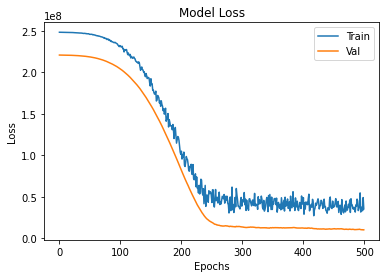

In [56]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

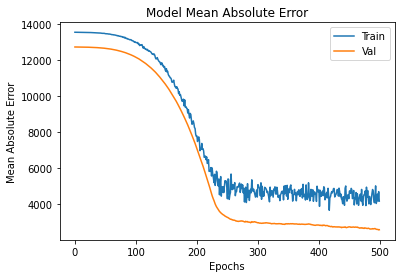

In [57]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["mae"])
plt.plot(hist.history["val_mae"])
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# (3) Final Model

In [58]:
# Build Model and Architecture of Deep Neural Network

model = Sequential()
model.add(Dense(10, activation='relu', input_dim=43))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [59]:
# Loss Function measures how well the model did on training and then tries
# to improve on it using optimizer
# optimizer=optimizers.RMSprop(lr=1e-4)
model.compile(optimizer='rmsprop',
             loss = 'mse',
             metrics = ['mae'])

In [60]:
hist = model.fit(
    x_train_f, y_train, epochs = 700,
    validation_data = (x_val_f, y_val)
)

Epoch 1/700
5/5 [==============================] - 1s 41ms/step - loss: 252507168.0000 - mae: 13653.0755 - val_loss: 221028080.0000 - val_mae: 12741.1006
Epoch 2/700
5/5 [==============================] - 0s 14ms/step - loss: 242087482.6667 - mae: 13523.2194 - val_loss: 221022432.0000 - val_mae: 12740.9014
Epoch 3/700
5/5 [==============================] - 0s 14ms/step - loss: 255595336.0000 - mae: 13725.8822 - val_loss: 221018032.0000 - val_mae: 12740.7334
Epoch 4/700
5/5 [==============================] - 0s 15ms/step - loss: 226638269.3333 - mae: 13125.3034 - val_loss: 221014016.0000 - val_mae: 12740.5811
Epoch 5/700
5/5 [==============================] - 0s 36ms/step - loss: 263143864.0000 - mae: 13962.7721 - val_loss: 221009696.0000 - val_mae: 12740.4092
Epoch 6/700
5/5 [==============================] - 0s 14ms/step - loss: 255084581.3333 - mae: 13623.8024 - val_loss: 221004240.0000 - val_mae: 12740.2021
Epoch 7/700
5/5 [==============================] - 0s 19ms/step - loss: 2459

Epoch 54/700
5/5 [==============================] - 0s 27ms/step - loss: 253384309.3333 - mae: 13662.3766 - val_loss: 218934448.0000 - val_mae: 12674.4395
Epoch 55/700
5/5 [==============================] - 0s 26ms/step - loss: 254941994.6667 - mae: 13563.1901 - val_loss: 218808816.0000 - val_mae: 12670.7373
Epoch 56/700
5/5 [==============================] - 0s 26ms/step - loss: 241441672.0000 - mae: 13401.7179 - val_loss: 218671952.0000 - val_mae: 12666.7432
Epoch 57/700
5/5 [==============================] - 0s 26ms/step - loss: 278316157.3333 - mae: 14178.3569 - val_loss: 218544592.0000 - val_mae: 12662.9316
Epoch 58/700
5/5 [==============================] - 0s 24ms/step - loss: 266017640.0000 - mae: 13993.8223 - val_loss: 218413152.0000 - val_mae: 12658.9951
Epoch 59/700
5/5 [==============================] - 0s 23ms/step - loss: 228859861.3333 - mae: 13050.7316 - val_loss: 218264976.0000 - val_mae: 12654.6367
Epoch 60/700
5/5 [==============================] - 0s 22ms/step - los

Epoch 107/700
5/5 [==============================] - 0s 21ms/step - loss: 225001104.0000 - mae: 12911.3696 - val_loss: 201086464.0000 - val_mae: 12160.0664
Epoch 108/700
5/5 [==============================] - 0s 21ms/step - loss: 256534813.3333 - mae: 13537.4113 - val_loss: 200472560.0000 - val_mae: 12142.1582
Epoch 109/700
5/5 [==============================] - 0s 20ms/step - loss: 228001250.6667 - mae: 12907.5615 - val_loss: 199816496.0000 - val_mae: 12123.0938
Epoch 110/700
5/5 [==============================] - 0s 21ms/step - loss: 228768765.3333 - mae: 12997.3120 - val_loss: 199126752.0000 - val_mae: 12103.1836
Epoch 111/700
5/5 [==============================] - 0s 20ms/step - loss: 214674386.6667 - mae: 12698.3016 - val_loss: 198458240.0000 - val_mae: 12083.7021
Epoch 112/700
5/5 [==============================] - 0s 21ms/step - loss: 228214757.3333 - mae: 12994.5423 - val_loss: 197761920.0000 - val_mae: 12063.4346
Epoch 113/700
5/5 [==============================] - 0s 42ms/ste

5/5 [==============================] - 0s 21ms/step - loss: 69546967.3333 - mae: 7025.2214 - val_loss: 59931104.0000 - val_mae: 6592.7661
Epoch 213/700
5/5 [==============================] - 0s 20ms/step - loss: 65888000.0000 - mae: 6894.3586 - val_loss: 58512352.0000 - val_mae: 6500.1978
Epoch 214/700
5/5 [==============================] - 0s 20ms/step - loss: 74612886.6667 - mae: 7221.3226 - val_loss: 57104236.0000 - val_mae: 6406.5269
Epoch 215/700
5/5 [==============================] - 0s 20ms/step - loss: 71461421.3333 - mae: 6996.6364 - val_loss: 55571268.0000 - val_mae: 6303.3853
Epoch 216/700
5/5 [==============================] - 0s 20ms/step - loss: 63787460.6667 - mae: 6583.7623 - val_loss: 54125312.0000 - val_mae: 6212.1968
Epoch 217/700
5/5 [==============================] - 0s 20ms/step - loss: 79229698.6667 - mae: 7115.6408 - val_loss: 52695864.0000 - val_mae: 6124.5469
Epoch 218/700
5/5 [==============================] - 0s 20ms/step - loss: 57292296.6667 - mae: 6277.43

Epoch 266/700
5/5 [==============================] - 0s 20ms/step - loss: 22661986.6667 - mae: 3876.6527 - val_loss: 21047510.0000 - val_mae: 4033.2698
Epoch 267/700
5/5 [==============================] - 0s 19ms/step - loss: 22940304.3333 - mae: 3860.9312 - val_loss: 20943656.0000 - val_mae: 4015.9167
Epoch 268/700
5/5 [==============================] - 0s 20ms/step - loss: 19822215.1667 - mae: 3566.3174 - val_loss: 20797560.0000 - val_mae: 3997.8547
Epoch 269/700
5/5 [==============================] - 0s 19ms/step - loss: 22056898.0000 - mae: 3808.8945 - val_loss: 20675774.0000 - val_mae: 3981.2156
Epoch 270/700
5/5 [==============================] - 0s 19ms/step - loss: 20846739.6667 - mae: 3575.2870 - val_loss: 20502746.0000 - val_mae: 3963.7341
Epoch 271/700
5/5 [==============================] - 0s 20ms/step - loss: 21482837.3333 - mae: 3685.9650 - val_loss: 20372736.0000 - val_mae: 3947.2454
Epoch 272/700
5/5 [==============================] - 0s 20ms/step - loss: 20071080.3333 

Epoch 320/700
5/5 [==============================] - 0s 20ms/step - loss: 15779514.0000 - mae: 3086.9498 - val_loss: 14819767.0000 - val_mae: 3333.6204
Epoch 321/700
5/5 [==============================] - 0s 22ms/step - loss: 16046605.8333 - mae: 3115.7531 - val_loss: 14732156.0000 - val_mae: 3323.8245
Epoch 322/700
5/5 [==============================] - 0s 20ms/step - loss: 17477890.1667 - mae: 3217.0412 - val_loss: 14622970.0000 - val_mae: 3314.4670
Epoch 323/700
5/5 [==============================] - 0s 20ms/step - loss: 15800172.8333 - mae: 3032.4494 - val_loss: 14533889.0000 - val_mae: 3304.7163
Epoch 324/700
5/5 [==============================] - 0s 19ms/step - loss: 16071337.8333 - mae: 3108.1539 - val_loss: 14485653.0000 - val_mae: 3295.7961
Epoch 325/700
5/5 [==============================] - 0s 20ms/step - loss: 14888107.6667 - mae: 3027.5477 - val_loss: 14411322.0000 - val_mae: 3286.5066
Epoch 326/700
5/5 [==============================] - 0s 39ms/step - loss: 15017327.1667 

Epoch 374/700
5/5 [==============================] - 0s 19ms/step - loss: 13255703.5000 - mae: 2766.7749 - val_loss: 11475561.0000 - val_mae: 2822.8003
Epoch 375/700
5/5 [==============================] - 0s 19ms/step - loss: 13060022.0000 - mae: 2830.9935 - val_loss: 11394492.0000 - val_mae: 2815.9495
Epoch 376/700
5/5 [==============================] - 0s 20ms/step - loss: 13713676.6667 - mae: 2832.8671 - val_loss: 11360596.0000 - val_mae: 2804.5906
Epoch 377/700
5/5 [==============================] - 0s 21ms/step - loss: 13065684.3333 - mae: 2734.5404 - val_loss: 11287981.0000 - val_mae: 2795.9749
Epoch 378/700
5/5 [==============================] - 0s 19ms/step - loss: 12498483.6667 - mae: 2757.5031 - val_loss: 11254673.0000 - val_mae: 2785.9033
Epoch 379/700
5/5 [==============================] - 0s 19ms/step - loss: 12426787.3333 - mae: 2739.4132 - val_loss: 11177314.0000 - val_mae: 2780.3396
Epoch 380/700
5/5 [==============================] - 0s 20ms/step - loss: 12165264.1667 

5/5 [==============================] - 0s 23ms/step - loss: 13008726.3333 - mae: 2630.7572 - val_loss: 9269947.0000 - val_mae: 2398.7515
Epoch 429/700
5/5 [==============================] - 0s 23ms/step - loss: 10269825.0000 - mae: 2490.8093 - val_loss: 9250653.0000 - val_mae: 2392.8127
Epoch 430/700
5/5 [==============================] - 0s 21ms/step - loss: 10728906.3333 - mae: 2417.7044 - val_loss: 9207994.0000 - val_mae: 2385.6426
Epoch 431/700
5/5 [==============================] - 0s 21ms/step - loss: 12084703.1667 - mae: 2584.6527 - val_loss: 9190199.0000 - val_mae: 2379.3052
Epoch 432/700
5/5 [==============================] - 0s 21ms/step - loss: 10821847.5000 - mae: 2446.8494 - val_loss: 9175998.0000 - val_mae: 2374.4517
Epoch 433/700
5/5 [==============================] - 0s 21ms/step - loss: 9805059.7500 - mae: 2366.6428 - val_loss: 9149103.0000 - val_mae: 2367.1143
Epoch 434/700
5/5 [==============================] - 0s 43ms/step - loss: 10621860.0000 - mae: 2480.0318 - va

5/5 [==============================] - 0s 20ms/step - loss: 7766171.0000 - mae: 2078.3844 - val_loss: 7095408.5000 - val_mae: 1870.7653
Epoch 537/700
5/5 [==============================] - 0s 20ms/step - loss: 8713106.6667 - mae: 2239.8423 - val_loss: 7093642.0000 - val_mae: 1868.5206
Epoch 538/700
5/5 [==============================] - 0s 19ms/step - loss: 8876197.0000 - mae: 2226.9004 - val_loss: 7086543.5000 - val_mae: 1866.4347
Epoch 539/700
5/5 [==============================] - 0s 19ms/step - loss: 8933211.0000 - mae: 2210.4508 - val_loss: 7054914.0000 - val_mae: 1863.2932
Epoch 540/700
5/5 [==============================] - 0s 38ms/step - loss: 7893373.1667 - mae: 2120.7967 - val_loss: 7036709.0000 - val_mae: 1861.9832
Epoch 541/700
5/5 [==============================] - 0s 18ms/step - loss: 8312526.8333 - mae: 2087.1976 - val_loss: 7041212.0000 - val_mae: 1861.0521
Epoch 542/700
5/5 [==============================] - 0s 18ms/step - loss: 9584337.0000 - mae: 2278.0951 - val_loss

Epoch 645/700
5/5 [==============================] - 0s 30ms/step - loss: 7991932.9167 - mae: 2112.0285 - val_loss: 6000198.0000 - val_mae: 1758.7467
Epoch 646/700
5/5 [==============================] - 0s 30ms/step - loss: 7243400.7500 - mae: 2017.1565 - val_loss: 5982999.5000 - val_mae: 1758.8634
Epoch 647/700
5/5 [==============================] - 0s 57ms/step - loss: 8062179.8333 - mae: 2100.7465 - val_loss: 5982477.0000 - val_mae: 1759.1091
Epoch 648/700
5/5 [==============================] - 0s 29ms/step - loss: 6974491.5000 - mae: 1923.3652 - val_loss: 5968473.5000 - val_mae: 1761.2772
Epoch 649/700
5/5 [==============================] - 0s 30ms/step - loss: 7399550.9167 - mae: 2052.0238 - val_loss: 5955495.5000 - val_mae: 1762.5190
Epoch 650/700
5/5 [==============================] - 0s 36ms/step - loss: 6688530.9167 - mae: 1927.6919 - val_loss: 5947477.5000 - val_mae: 1762.7711
Epoch 651/700
5/5 [==============================] - 0s 32ms/step - loss: 7049422.9167 - mae: 1980.1

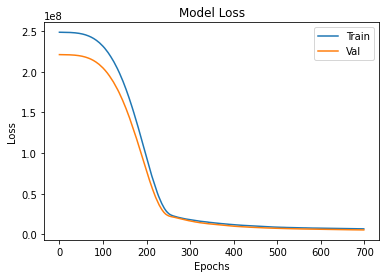

In [61]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

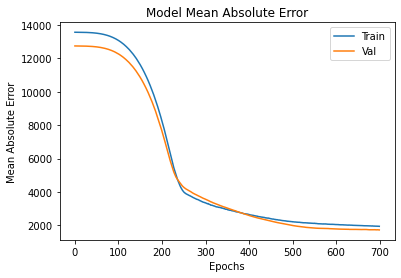

In [62]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["mae"])
plt.plot(hist.history["val_mae"])
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

## Model Evaluation on Test Data

In [63]:
model.evaluate(x_test_f, y_test)

1/1 [==============================] - 0s 22ms/step - loss: 8709257.0000 - mae: 2013.0500


[8709257.0, 2013.050048828125]

In [64]:
### Model Loss is 2013

# Get the Model's Predicted Values based on XTest data

In [64]:
predictions = model.predict(x_test_f)

In [65]:
print(len(predictions))
print(len(x_test_f))

31
31


In [66]:
predictions

array([[ 6653.6294],
       [12030.983 ],
       [30173.6   ],
       [ 8935.224 ],
       [ 9041.026 ],
       [ 6573.133 ],
       [ 6470.0986],
       [13496.738 ],
       [ 5931.684 ],
       [ 5967.733 ],
       [ 6465.1587],
       [16802.441 ],
       [15209.555 ],
       [ 8553.798 ],
       [ 7899.126 ],
       [ 6002.7466],
       [ 8254.987 ],
       [ 6838.8735],
       [ 2210.3806],
       [ 7469.237 ],
       [ 6343.631 ],
       [ 8759.34  ],
       [ 7545.9307],
       [16103.445 ],
       [28192.176 ],
       [15226.4375],
       [ 9820.852 ],
       [ 5689.6084],
       [16430.043 ],
       [ 9591.423 ],
       [30968.467 ]], dtype=float32)

In [67]:
y_test['price'].values

array([ 9095., 16925., 41315.,  8058.,  8558.,  7957., 10295., 12964.,
        7295.,  6229., 11248., 18150., 18150., 10898.,  8948.,  7129.,
        8249.,  7799.,  5151.,  8238.,  7999.,  9980.,  6669., 11199.,
       25552., 17669., 10245.,  6488., 16515., 10198., 32250.])

# Plot Data to See Variations in Predictions

In [68]:
y_train['Type'] = 'Train'

C:\ProgramData\Anaconda3\envs\amir-gpu3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
y_test['Type'] = 'Test'

In [70]:
pred = pd.DataFrame(data = predictions,index = y_test.index, columns=['Predcited Price'])

In [71]:
plot = pd.DataFrame()
plot = pd.concat([y_train,y_test])
plot = plot.merge(pred,how='left',left_index=True, right_index=True)

In [72]:
plot

,price,Type,Predcited Price
124,12764.0,Train,NaN
181,15750.0,Train,NaN
154,7898.0,Train,NaN
53,6695.0,Train,NaN
94,7299.0,Train,NaN
...,...,...,...
62,10245.0,Test,9820.851562
152,6488.0,Test,5689.608398
197,16515.0,Test,16430.042969
147,10198.0,Test,9591.422852


In [73]:
plot_s = plot.reset_index()

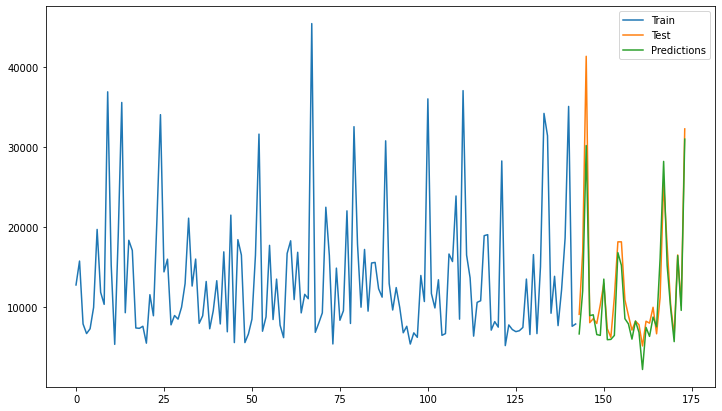

In [74]:
plt.figure(figsize=(12,7))
plt.plot(plot_s[plot_s.Type == 'Train']['price'],label='Train')
plt.plot(plot_s[plot_s.Type == 'Test']['price'],label='Test')
plt.plot(plot_s['Predcited Price'],label='Predictions')
plt.legend()
plt.show()